0 = away team win, 1 = home team win


Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       427
           1       0.88      0.88      0.88       609

    accuracy                           0.86      1036
   macro avg       0.85      0.85      0.85      1036
weighted avg       0.86      0.86      0.86      1036



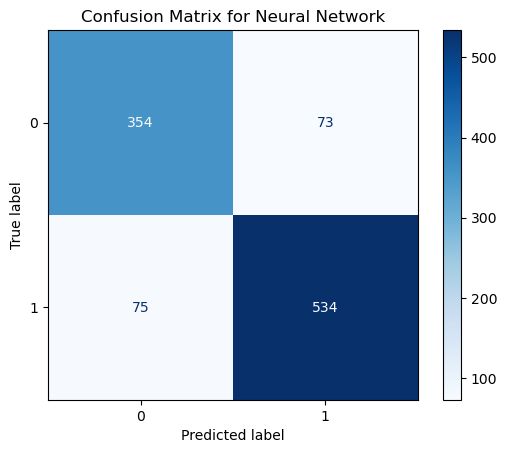

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Selecting specific stats from NFL games to use as features: each team's first downs, total yards, turnovers, penalties, and third down conversion percentage
# Using these features to predict the winner of the game
columns_to_read = ['away_first_downs', 'away_total_yards', 'away_turnovers', 'away_penalties', 'away_third_down_percent', 'home_first_downs', 'home_total_yards', 'home_turnovers', 'home_penalties', 'home_third_down_percent', 'home_team_win']

df = pd.read_csv('nfl_historical_data_upto_2012.csv', usecols=columns_to_read)

X = df[['away_first_downs', 'away_total_yards', 'away_turnovers', 'away_penalties', 'away_third_down_percent', 'home_first_downs', 'home_total_yards', 'home_turnovers', 'home_penalties', 'home_third_down_percent']]
y = df['home_team_win']

# Splitting data using 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Hidden layer sizes of 5 and 11 produced highest accuracy, with relu as best activation function
mlp = MLPClassifier(hidden_layer_sizes=(5, 11), activation='relu', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('0 = away team win, 1 = home team win\n\n')
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=cm)
confusion_matrix_display.plot(cmap='Blues')
plt.title('Confusion Matrix for Neural Network')
plt.show()